# EXPLORATORY DATA ANALYSIS

IMPORTING THE LIBRARIES

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [52]:
#Loading the train and test dataset
train=pd.read_csv('doctorfee_Train.csv',encoding='latin1')
test=pd.read_csv('doctorfee_Test.csv')

#to resolve utf-8 encoding error,encoding='latin1' is used

In [53]:
train.shape

(5961, 7)

In [54]:
test.shape

(1987, 6)

In [55]:
#adding an extra column source to know train and test datas and joing both datasets
train["source"]="train"
test["source"]="test"
test['Fees']=0
d1=pd.concat([train,test],ignore_index=True)
d1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,train


In [56]:
d1.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,0,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,0,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,0,test
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,0,test
7947,"MBBS, MD - Dermatology , Venereology & Leprosy",8 years experience,NaN,"Pallikaranai, Chennai",Dermatologists,"1 Feedback Pallikaranai, Chennai ?500",0,test


In [57]:
d1.shape

(7948, 8)

#there are 7948 rows and 8 columns in the dataset

In [58]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       7948 non-null   object
 1   Experience          7948 non-null   object
 2   Rating              3556 non-null   object
 3   Place               7917 non-null   object
 4   Profile             7948 non-null   object
 5   Miscellaneous_Info  4494 non-null   object
 6   Fees                7948 non-null   int64 
 7   source              7948 non-null   object
dtypes: int64(1), object(7)
memory usage: 496.9+ KB


In [59]:
#dropping unwanted column as it provides no information for our analysis
d1.drop('Miscellaneous_Info',axis=1,inplace=True)

In [60]:
#checking number of unique values in each row
d1.nunique()

Qualification    1801
Experience         64
Rating             52
Place             948
Profile             6
Fees               41
source              2
dtype: int64

In [61]:
print(d1["Qualification"].unique())

['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine'
 'MBBS, MS - General Surgery, FAIS, FIAGES'
 'MBBS, MD / MS - Obstetrics & Gynaecology']


In [63]:
#checking whether any nana values are present
print(d1["Rating"].unique())

['100%' '98%' nan '99%' '79%' '95%' '97%' '94%' '88%' '90%' '80%' '93%'
 '36%' '78%' '87%' '96%' '82%' '89%' '74%' '86%' '92%' '83%' '76%' '85%'
 '56%' '91%' '68%' '60%' '75%' '69%' '73%' '67%' '77%' '33%' '55%' '71%'
 '84%' '45%' '63%' '72%' '81%' '62%' '57%' '7%' '48%' '40%' '70%' '64%'
 '65%' '47%' '58%' '53%' '52%']


In [64]:
#replacing the nan value
d1["Rating"].replace("nan","98%",inplace=True)

In [66]:
print(d1["Profile"].unique())

['Homeopath' 'Ayurveda' 'ENT Specialist' 'Dentist' 'General Medicine'
 'Dermatologists']


In [67]:
#converting object datatype columns into integer using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=["Qualification","Experience","Rating","Place","Profile","source"]
for val in list1:
    d1[val]=le.fit_transform(d1[val].astype(str))

In [68]:
d1.isnull().values.any()

False

In [69]:
d1.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
source           0
dtype: int64

In [70]:
d1["Fees"]=d1["Fees"].fillna(d1["Fees"].median())

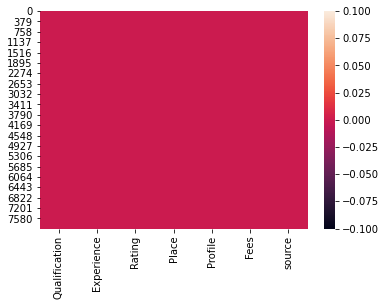

In [71]:
sns.heatmap(d1.isnull())

In [72]:
d1.describe()

,Qualification,Experience,Rating,Place,Profile,Fees,source
count,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.00000
mean,756.032461,23.004278,43.666457,453.344112,2.458606,230.958480,0.75000
std,525.721528,20.890855,16.643974,282.194640,1.657217,212.413839,0.43304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,284.750000,6.000000,46.000000,214.750000,1.000000,3.750000,0.75000
50%,749.000000,15.000000,52.000000,449.000000,2.000000,200.000000,1.00000
75%,1193.000000,35.000000,52.000000,687.000000,4.000000,400.000000,1.00000
max,1800.000000,63.000000,52.000000,948.000000,5.000000,950.000000,1.00000


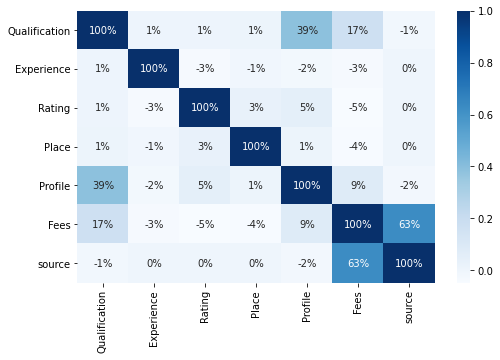

In [73]:
d1cor=d1.corr()
plt.figure(figsize=(8,5))
sns.heatmap(d1cor,cmap='Blues',annot=True,fmt='.0%')
plt.show()

In [74]:
#correlation can be expressed in matrix form
corr_matrix=d1.corr()
print(corr_matrix["Fees"].sort_values(ascending=False))

Fees             1.000000
source           0.627795
Qualification    0.170814
Profile          0.086961
Experience      -0.032440
Place           -0.042448
Rating          -0.047366
Name: Fees, dtype: float64


In [75]:
collist=d1.columns.values
ncol=20
nrows=8

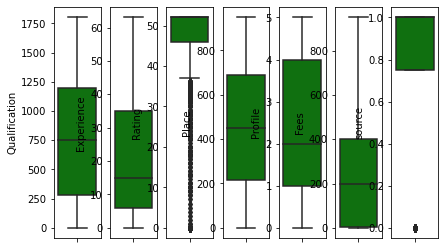

In [76]:
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d1[collist[i]],color='green',orient='v')

# UNIVARIATE ANALYSIS

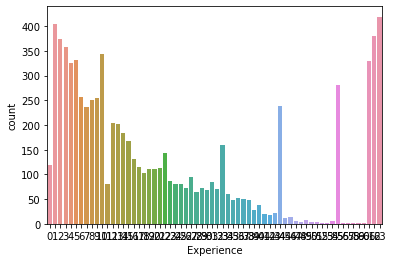

In [79]:
sns.countplot(d1["Experience"])

#Most of them are very less experienced ranging from 0 years to 8-9 years.Only few are experienced more than 20 years and There is a large number who are well experienced

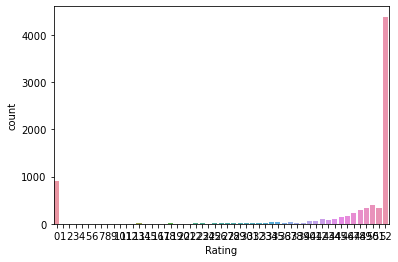

In [80]:
sns.countplot(d1["Rating"])

#majority are high rated and nearly 1000 have 0 rating.

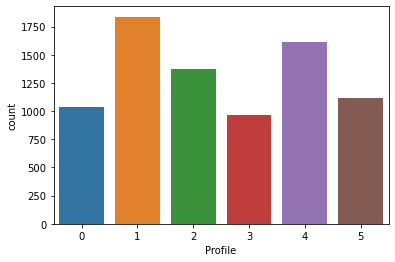

In [81]:
sns.countplot(d1["Profile"])

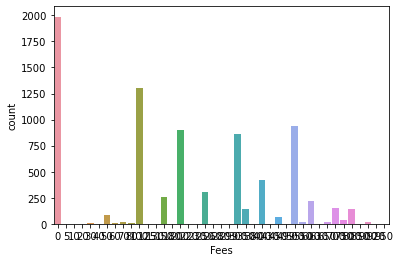

In [82]:
sns.countplot(d1["Fees"])

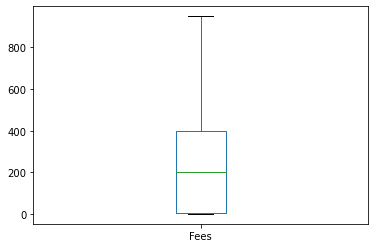

In [83]:
d1["Fees"].plot.box()

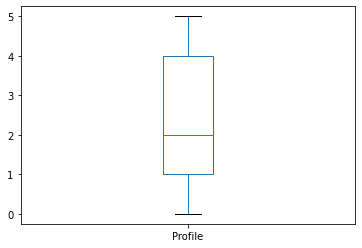

In [84]:
d1["Profile"].plot.box()

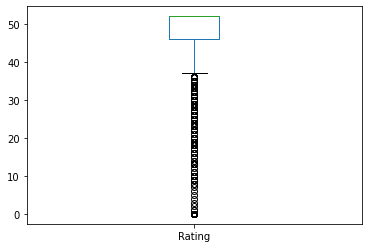

In [85]:
d1["Rating"].plot.box()

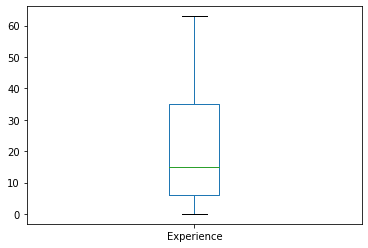

In [86]:
d1["Experience"].plot.box()

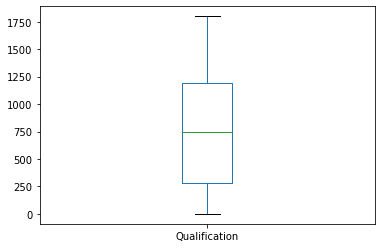

In [87]:
d1["Qualification"].plot.box()

#Black dots in the boxplots represents outliers

# Bivariate analysis

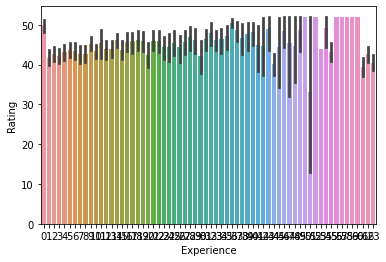

In [89]:
sns.barplot(x=d1['Experience'],y=d1['Rating'])

In [90]:
d1.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Fees',
       'source'],
      dtype='object')

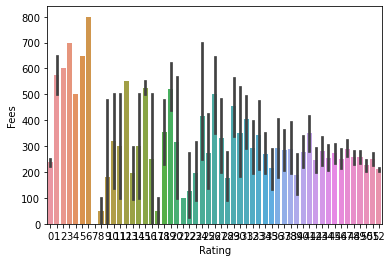

In [91]:
sns.barplot(x=d1['Rating'],y=d1['Fees'])

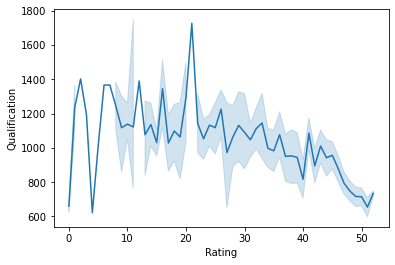

In [93]:
sns.lineplot(x="Rating",y="Qualification",data=d1)
plt.show()

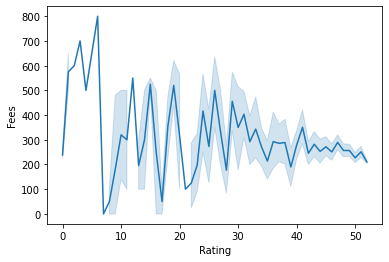

In [94]:
sns.lineplot(x="Rating",y="Fees",data=d1)
plt.show()

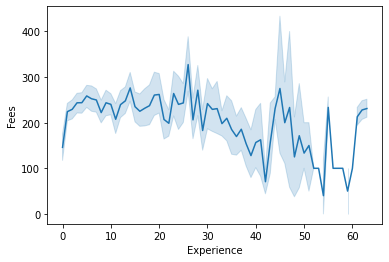

In [95]:
sns.lineplot(x="Experience",y="Fees",data=d1)
plt.show()

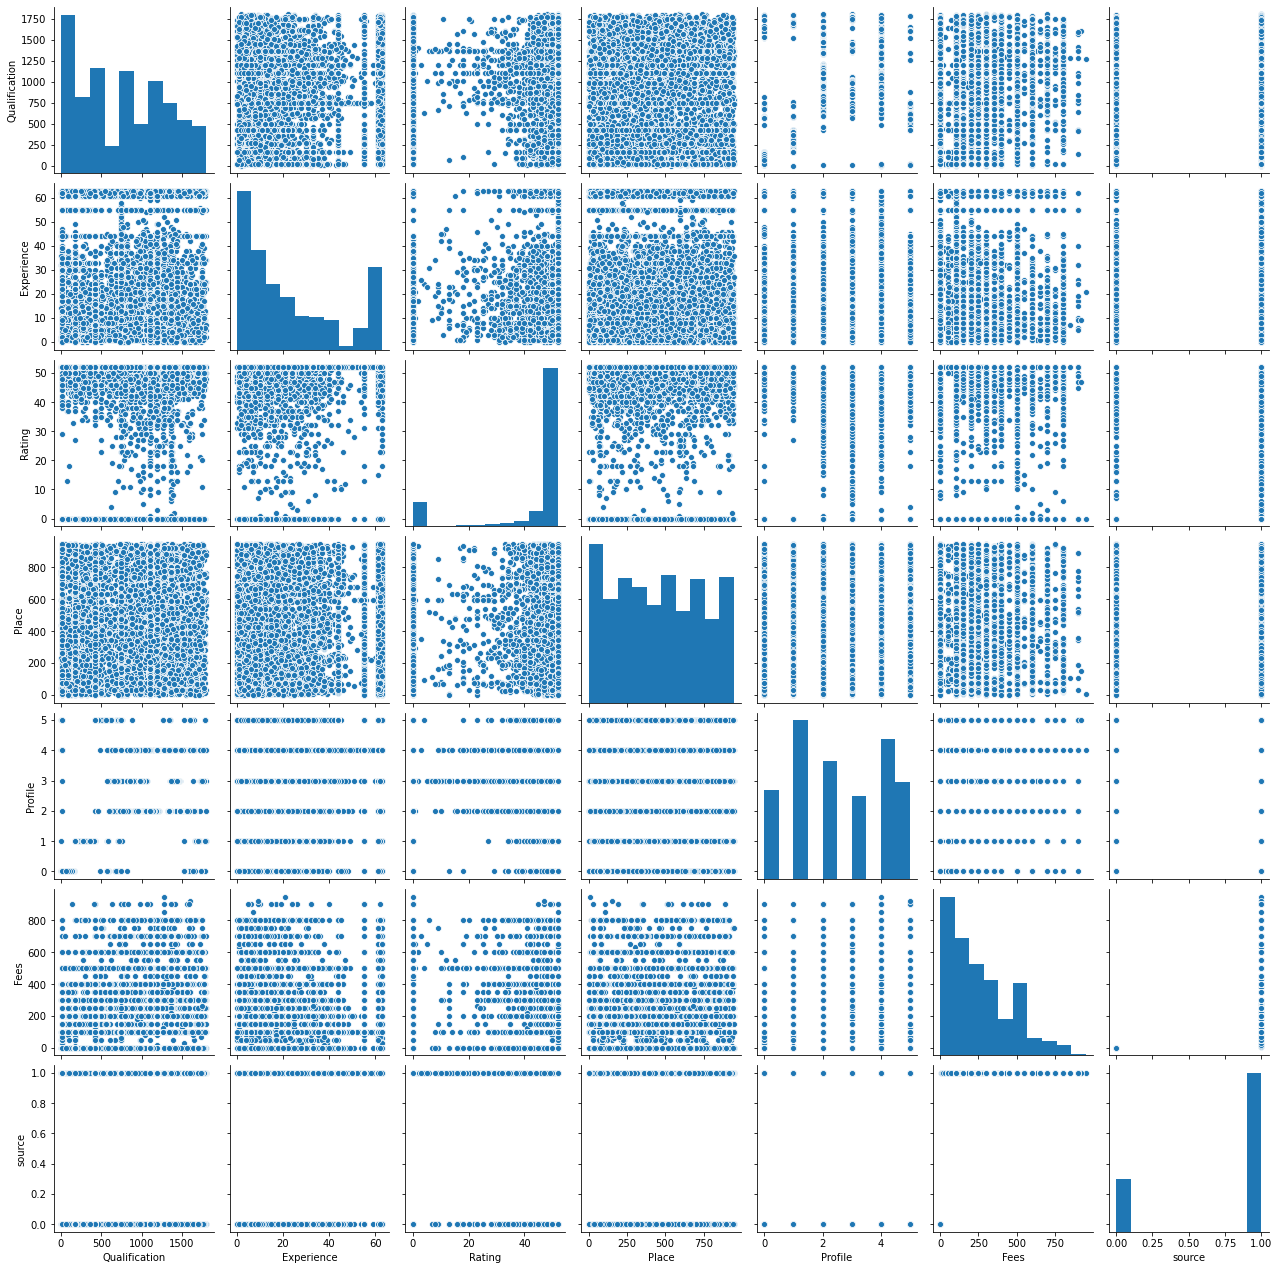

In [97]:
sns.pairplot(d1)

In [98]:
d1.skew()

Qualification    0.247541
Experience       0.826304
Rating          -2.060924
Place            0.104400
Profile          0.088789
Fees             0.782582
source          -1.154919
dtype: float64

In [102]:
#skewness can be removed using yeo_johnson method
from sklearn.preprocessing import power_transform
d1=pd.DataFrame(power_transform(d1,method='yeo-johnson'),columns=d1.columns)
d1.skew()

Qualification   -0.283846
Experience      -0.167201
Rating          -1.788572
Place           -0.274831
Profile         -0.144787
Fees            -0.821743
source          -1.154919
dtype: float64

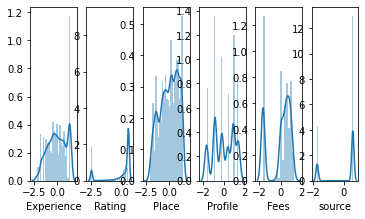

In [103]:
plt.figure(figsize=(20,30))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d1[collist[i]])

In [105]:
from scipy.stats import zscore
columns=['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'source']
for i in range(len(columns)):
    d1[columns[i]]=zscore(d1[columns[i]])
    for j in range(len(d1[columns[i]])):
        if d1[columns[i]][j]>3 or d1[columns[i]][j]<-3:
            d1[columns[i]].replace(d1[columns[i]][j],d1[columns[i]].median(),inplace=True)
            d1[columns[i]]=np.cbrt((d1[columns[i]]))

In [106]:
x=d1[columns]
y=d1[["Fees"]]

In [107]:
print(x.shape)
print(y.shape)

(7948, 6)
(7948, 1)


In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.30057081,  0.06679543, -2.47272417, -0.30187001,  1.41755594,
         0.57735027],
       [-1.40800689, -1.223543  ,  0.35993778,  1.49656533, -1.64659049,
         0.57735027],
       [ 1.17779105,  1.43362034,  0.56595699,  0.28082575,  0.40523677,
         0.57735027],
       ...,
       [ 1.05255052,  1.43362034,  0.56595699,  0.77331355,  0.93106829,
        -1.73205081],
       [-1.11973892, -1.223543  ,  0.35993778, -1.74190233, -0.83584536,
        -1.73205081],
       [ 0.73259452,  1.41648367,  0.56595699,  0.62641907, -0.17454114,
        -1.73205081]])

In [109]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [110]:
max_r_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 40 is 0.9150388315285192


In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=40)

In [112]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6358, 6)
(1590, 6)
(6358, 1)
(1590, 1)


# Model selection

In [113]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn .linear_model import Lasso,Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [114]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('******************************************************************************')
    print('\n')

score of LinearRegression() is: 0.9013295530902747
Error:
Mean absolute error: 0.22995631308342607
Mean squared error: 0.0892785238903773
Root mean squared error: 0.29879512025864363
r2_score: 0.9150388315285192
******************************************************************************


score of DecisionTreeRegressor() is: 0.999683444669739
Error:
Mean absolute error: 0.2666950353931994
Mean squared error: 0.16674391981993425
Root mean squared error: 0.4083428949056592
r2_score: 0.8413195285261268
******************************************************************************


score of KNeighborsRegressor() is: 0.931800057028069
Error:
Mean absolute error: 0.21250872302935456
Mean squared error: 0.09630336709345913
Root mean squared error: 0.3103278380897517
r2_score: 0.9083536976255929
******************************************************************************


score of SVR() is: 0.9111334106764095
Error:
Mean absolute error: 0.21066809671874193
Mean squared error: 0.08283996

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,random_state=51)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,predrf))
print('mean squared error:',mean_squared_error(y_test,predrf))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))
print(r2_score(y_test,predrf))

mean absolute error: 0.19752226299172415
mean squared error: 0.08325727765314317
root mean squared error: 0.2885433722218259
0.9207689006837626


In [116]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,ad_pred))
print('mean squared error:',mean_squared_error(y_test,ad_pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,ad_pred)))
print(r2_score(y_test,ad_pred))

mean absolute error: 0.2141551858277661
mean squared error: 0.08769722642955204
root mean squared error: 0.29613717502122566
0.9165436601717174


In [118]:
#Random forest regressor gives best r2_score,so checking its cross val score
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[ 1.07858311e-01  1.28101143e-01  1.59926463e-01  9.14126967e-01
 -1.51111111e+02]
-29.960219645596414 60.57620546563676


In [119]:
import joblib
joblib.dump(rf,'rf_doctor_fee.pkl')

['rf_doctor_fee.pkl']